In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

ANN IMPLEMENTATION




*  Loading the cifar-10 dataset




In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step




*  normalize the pixel values to[0,1]




In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0



*   flatten the images for ANN input




In [4]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)



*  define the ANN model


In [5]:
ann_model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(x_train_flat.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




*  compile the model


In [6]:
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])



* Early Stopping callback  


In [7]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',    # Monitor validation loss
    patience=3,            # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Restore the best model weights after stopping
)



*  train the model


In [8]:
history_ann = ann_model.fit(x_train_flat, y_train, epochs=20,
                            validation_data=(x_test_flat, y_test),
                            callbacks=[early_stopping],         # Add EarlyStopping callback
                             batch_size=32)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.2803 - loss: 2.0163 - val_accuracy: 0.3591 - val_loss: 1.7743
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.3915 - loss: 1.6932 - val_accuracy: 0.4140 - val_loss: 1.6356
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4220 - loss: 1.6046 - val_accuracy: 0.4380 - val_loss: 1.5799
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4448 - loss: 1.5402 - val_accuracy: 0.4239 - val_loss: 1.5839
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4596 - loss: 1.5045 - val_accuracy: 0.4464 - val_loss: 1.5491
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4712 - loss: 1.4737 - val_accuracy: 0.4692 - val_loss: 1.4781
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.4801 - loss: 1.4440 - val_accuracy: 0.4682 - val_loss: 1.4787
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.4895 -



* Evaluate the model  




In [9]:
ann_test_loss, ann_test_acc = ann_model.evaluate(x_test_flat, y_test)
print(f"ANN Test accuracy: {ann_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4841 - loss: 1.4275
ANN Test accuracy: 0.4864


CNN IMPLEMENTATION



* defining CNN model


In [10]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




*  compile the model


In [11]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])



* Early stopping  




In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



*  train the model

In [13]:
history_cnn = cnn_model.fit(x_train, y_train, epochs=20,
                            validation_data=(x_test, y_test),
                            callbacks=[early_stopping])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3398 - loss: 1.7709 - val_accuracy: 0.5653 - val_loss: 1.2163
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.5828 - loss: 1.1768 - val_accuracy: 0.6445 - val_loss: 1.0230
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6504 - loss: 0.9876 - val_accuracy: 0.6395 - val_loss: 1.0231
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6892 - loss: 0.8920 - val_accuracy: 0.6836 - val_loss: 0.8975
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.7182 - loss: 0.8051 - val_accuracy: 0.6899 - val_loss: 0.8857
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7402 - loss: 0.7408 - val_accuracy: 0.6969 - val_loss: 0.8582
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.7629 - loss: 0.6820 - val_accuracy: 0.6837 - val_loss: 0.9254
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7768 -



*  evaluate the model


In [14]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)
print(f"CNN Test accuracy: {cnn_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7268 - loss: 0.7977
CNN Test accuracy: 0.7242


Visualize accuracy and loss curves

In [15]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()



*  plotting ANN history



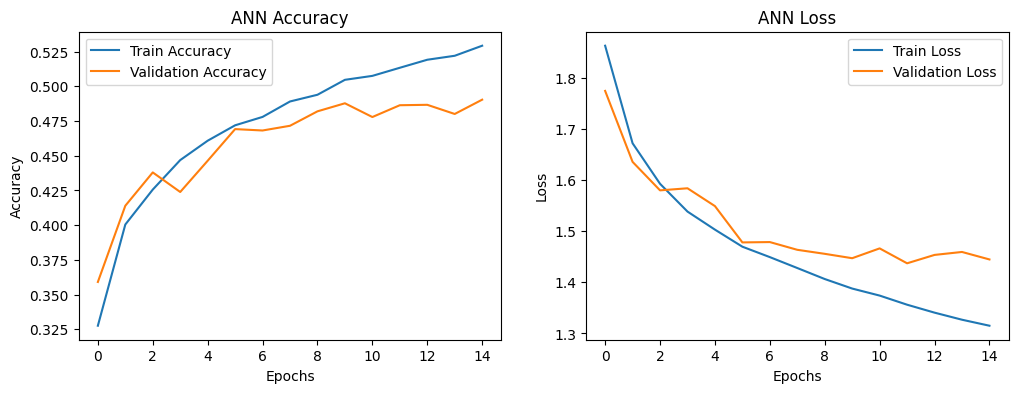

In [16]:
plot_history(history_ann, 'ANN')



*  plotting CNN history


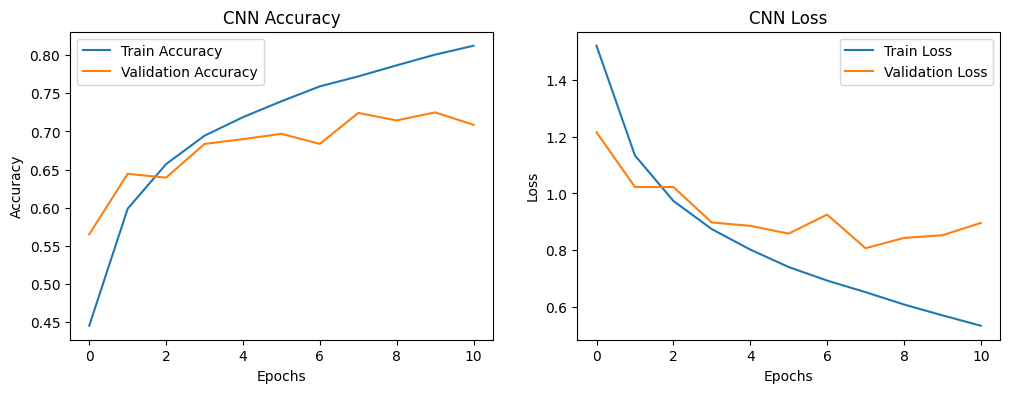

In [17]:
plot_history(history_cnn, 'CNN')